# House Pricing Analysis & Prediction

# Team Members

| Name  | Student ID | Steps Performed |
| :- | -: | :- |
| Sai Kumar Adulla   | C0863741 | Data Selection, GitHub Repository and Cloud Deployment |
| Jenny Jitender Joshi | C0862907 | Data Cleaning, Data Exploration and Flask Web Application |
| Kanika Kataria  | C0866652 | Data Exploration, Feature Engineering and Flask Web Application |
| Christin Paul | C0863254 | Feature Engineering, Model Selection and GitHub Repository|
| Abbas Ismail | C0867092 | Hyperparameter Tuning, Pickle Files and Cloud Deployment |


## Importing All Dependencies & Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

# Why we selected this particular dataset?

- **Real-world Relevance:**
  - Focus on Bangalore real estate market.
  - Practical applications for investors and homebuyers.
<p></p>

- **Data Size and Diversity:**
  - 13,320 records with diverse features.
  - Includes area type, availability, location, size, society, etc.
<p></p>

- **Prediction Challenge:**
  - Complex relationships influence property prices.
  - Challenging problem for predictive modeling.
<p></p>

- **Data Quality Issues:**
  - Null values in multiple columns.
  - Reflects real-world data scenarios.
<p></p>

- **Economic Indicators:**
  - Property prices as indicators of economic health.
  - Insights into regional economic trends.
<p></p>

- **Practical Significance:**
  - Impacts real estate developers, investors, individuals.
  - Decision-making aid in property transactions.
<p></p>

- **Interdisciplinary Aspect:**
  - Combines data analysis, cleaning, and predictive modeling.
  - Applies skills in statistics, machine learning, and domain knowledge.
<p></p>

- **Data Types:**
  - Mix of categorical and numerical data.
  - Diverse techniques for preprocessing and modeling.
<p></p>

- **Data Exploration Opportunities:**
  - Variety of features for exploratory data analysis.
  - Uncover patterns, trends, and correlations.
<p></p>

- **Potential Business Impact:**
  - Predicting property prices influences decisions.
  - Significant impact on business and investment strategies.


In [10]:
house=pd.read_csv('House Prices.csv')

# Output a message indicating the dataset for house pricing
print("House Pricing Dataset:")

# Display the contents of the dataset using the 'display' function
display(house)

House Pricing Dataset:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Reviewing the Dataset

In [11]:
# Print a message displaying the counts of null values
print("Null Value Counts:")

# Use the 'isnull().sum()' method to show the sum of null values for each column in the 'house' dataset
display(house.isnull().sum())

Null Value Counts:


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
# Print a message providing a description of the dataset
print("Dataset Description:")

# Use the 'describe()' method to display the statistical summary of the 'house' dataset
display(house.describe())

Dataset Description:


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [13]:
# Print a message conveying dataset information
print("Dataset Information:")

# Utilize the 'info()' method to showcase the information summary of the 'house' dataset
display(house.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


None

In [14]:
# Displaying the value counts for each column in the 'house' dataset
print("Checking the Value Counts of Each Column:")
for column in house.columns:
    print(house[column].value_counts())
    print('*' * 30)

Checking the Value Counts of Each Column:
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
******************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
******************************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, 

# Data Cleaning

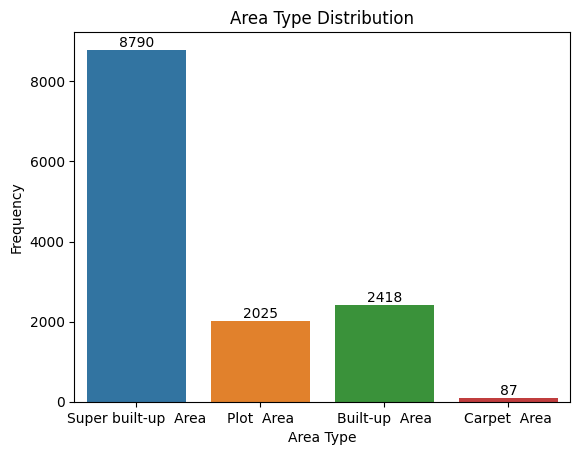

In [15]:
# Visualizing the distribution of 'area_type' in the 'house' dataset using seaborn
ax = sns.countplot(x="area_type", data=house)

# Adding labels to display frequencies on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Adding axis labels and title
plt.xlabel("Area Type")
plt.ylabel("Frequency")
plt.title("Area Type Distribution")

# Display the plot
plt.show()

In [16]:
# Filling null values in the 'size' column with '2 BHK'
house['size'] = house['size'].fillna('2 BHK')

# Displaying the count of null values in the 'size' column after filling
print("Filling Null Values in Size:")
display(house['size'].isnull().sum())

Filling Null Values in Size:


0

In [17]:
# Extracting the numerical part of the 'size' column and converting it to integer
house['size'] = house['size'].str.split().str.get(0).astype(int)

# Displaying the value counts after separating and converting to int
print("Separating the Numerical Part of Size Column & Converting It to Integer:")
display(house['size'].value_counts())

Separating the Numerical Part of Size Column & Converting It to Integer:


size
2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

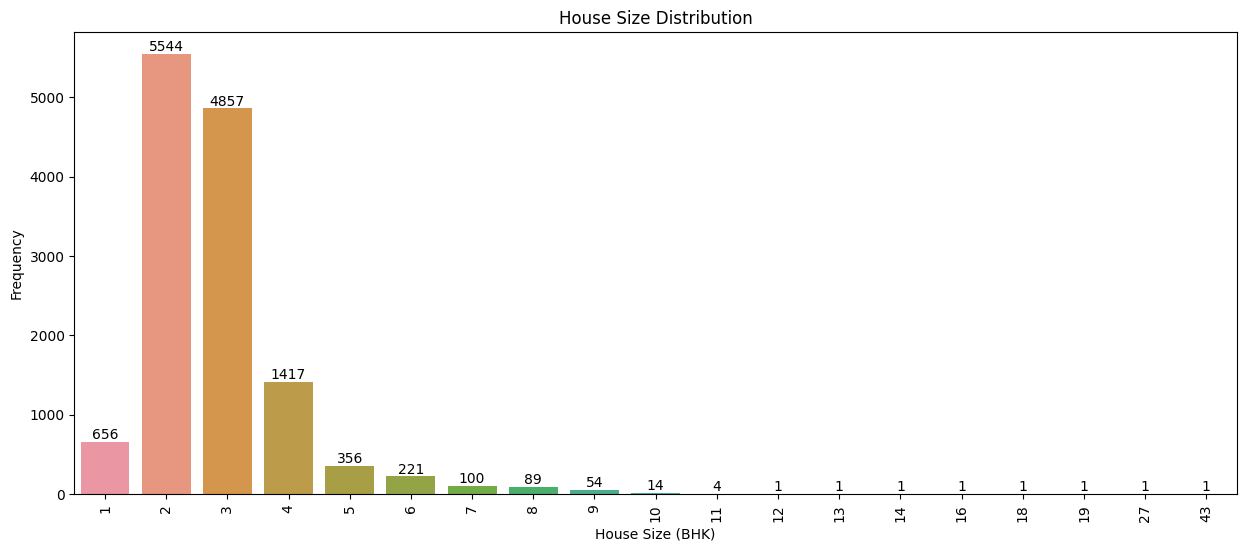

In [18]:
# Setting the figure size
plt.figure(figsize=(15, 6))

# Creating a count plot for the 'size' column in the 'house' dataset using seaborn
ax = sns.countplot(x="size", data=house)

# Adding labels to display frequencies on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Adding axis labels, rotation, and title
plt.xlabel("House Size (BHK)")
plt.xticks(rotation="vertical")
plt.ylabel("Frequency")
plt.title("House Size Distribution")

# Displaying the plot
plt.show()

In [19]:
# Filling null values in the 'bath' column with the median value
print("Filling Null Values of Bath:")
house['bath'] = house['bath'].fillna(house['bath'].median())

# Displaying the 'bath' column after filling null values
display(house["bath"])
print()

# Displaying the count of null values in the 'bath' column
print("Null Value Count in Bath:")
display(house['bath'].isnull().sum())

Filling Null Values of Bath:


0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64


Null Value Count in Bath:


0

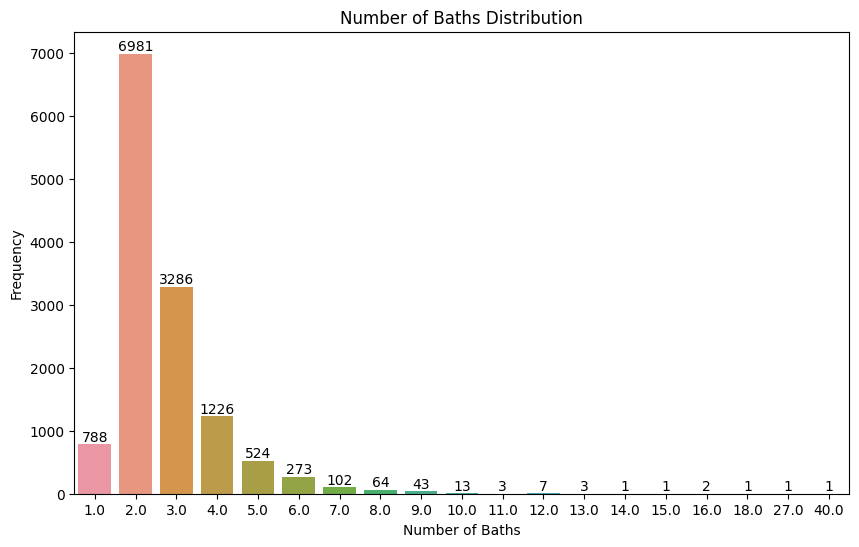

In [20]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a count plot for the 'bath' column in the 'house' dataset using seaborn
ax = sns.countplot(x="bath", data=house)

# Adding labels to display frequencies on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Adding axis labels and title
plt.xlabel("Number of Baths")
plt.ylabel("Frequency")
plt.title("Number of Baths Distribution")

# Displaying the plot
plt.show()

In [21]:
# Filling null values in the 'balcony' column with the value 2
house['balcony'] = house['balcony'].fillna(2)

# Displaying the count of null values in the 'balcony' column after filling
print("Filling Nulls in the Balcony Column:")
display(house['balcony'].isnull().sum())

Filling Nulls in the Balcony Column:


0

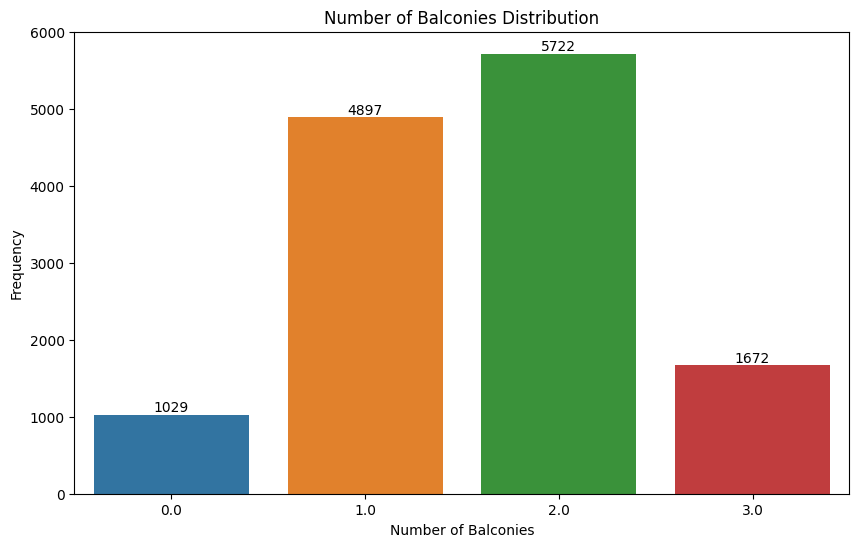

In [22]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a count plot for the 'balcony' column in the 'house' dataset using seaborn
ax = sns.countplot(x="balcony", data=house)

# Adding labels to display frequencies on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Adding axis labels and title
plt.xlabel("Number of Balconies")
plt.ylabel("Frequency")
plt.title("Number of Balconies Distribution")

# Displaying the plot
plt.show()

In [23]:
# Filling null values in the 'location' column with the string 'Sarjapur Road'
house['location'] = house['location'].fillna('Sarjapur Road')

# Displaying the count of null values in the 'location' column after filling
print("Filling Nulls in Location Column:")
display(house['location'].isnull().sum())

Filling Nulls in Location Column:


0